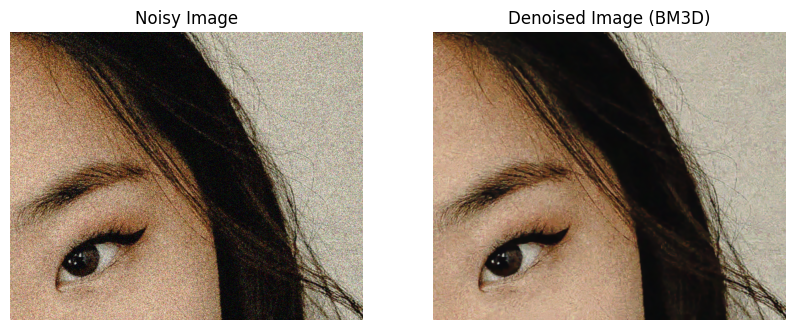

True

In [1]:
import numpy as np
import cv2
import bm3d
import matplotlib.pyplot as plt

# Load a noisy image (replace with your image path)
noisy_image_path = 'eye.jpg'
noisy_image = cv2.cvtColor(cv2.imread(noisy_image_path , cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
noisy_image = noisy_image.astype(np.float32) / 255.0  # Normalize to [0, 1]

# Add synthetic Gaussian noise (if your image is already noisy, skip this step)
noise_std = 0.1  # Standard deviation of the noise
noisy_image += np.random.normal(0, noise_std, noisy_image.shape)

# Clip the noisy image to ensure pixel values are within [0, 1]
noisy_image = np.clip(noisy_image, 0, 1)

# Apply BM3D denoising
denoised_image = bm3d.bm3d(noisy_image, sigma_psd=noise_std)

# Clip the denoised image to ensure pixel values are within [0, 1]
denoised_image = np.clip(denoised_image, 0, 1)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Denoised Image (BM3D)')
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')

plt.show()

# Save the denoised image
denoised_image_path = 'BM3D.png'
denoised_image_uint8 = (denoised_image * 255).astype(np.uint8)  # Convert back to [0, 255]
cv2.imwrite(denoised_image_path, denoised_image_uint8)